<a href="https://colab.research.google.com/github/KateT840/Lab_moderna_con_Emma/blob/main/Lab3/Gr%C3%A1fica_de_los_tres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import os
from google.colab import drive
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib.ticker import ScalarFormatter
from sklearn.linear_model import LinearRegression

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
os.chdir("/content/drive/MyDrive/Laboratorio_moderna/")
!ls

'Ajuste de Balmer: Hidrógeno.png'       Lab1   Lab3
'Interpolación cuadrática para H.png'   Lab2


In [38]:
file_1 = '/content/drive/MyDrive/Laboratorio_moderna/Lab3/neon.txt'
file_2 = '/content/drive/MyDrive/Laboratorio_moderna/Lab3/hidrogeno.txt'
file_3 = '/content/drive/MyDrive/Laboratorio_moderna/Lab3/deuterio.txt'
file_4 = '/content/drive/MyDrive/Laboratorio_moderna/Lab3/mercurio.txt'
file_5= '/content/drive/MyDrive/Laboratorio_moderna/Lab3/sodio.txt'
file_1, file_2, file_3, file_4, file_5

('/content/drive/MyDrive/Laboratorio_moderna/Lab3/neon.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab3/hidrogeno.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab3/deuterio.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab3/mercurio.txt',
 '/content/drive/MyDrive/Laboratorio_moderna/Lab3/sodio.txt')

In [40]:
df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)
df_3 = pd.read_csv(file_3)
df_4 = pd.read_csv(file_4)
df_5 = pd.read_csv(file_5)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-835366756.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_1 = pd.read_csv(file_1, sep="\s+", header=None, names=["x","y"])
/tmp/ipython-input-835366756.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_2 = pd.read_csv(file_2, sep="\s+", header=None, names=["x","y"])
/tmp/ipython-input-835366756.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])


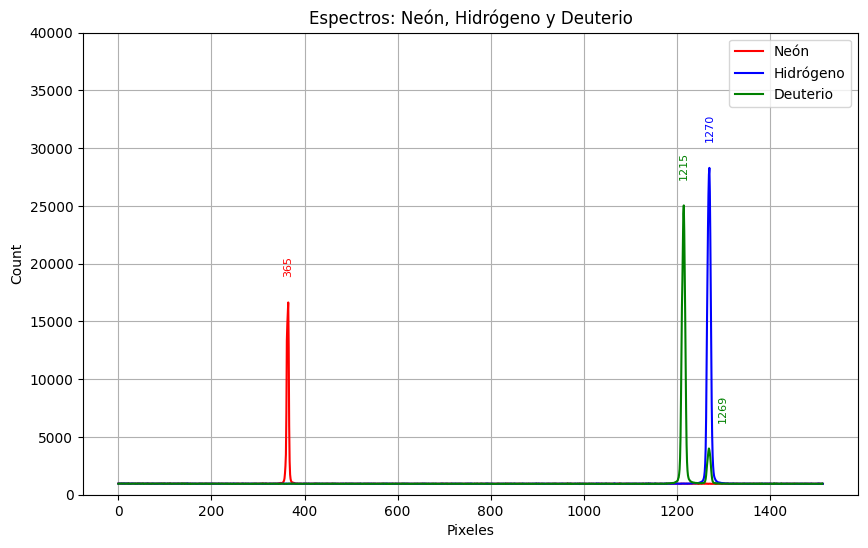

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Leer archivos
df_1 = pd.read_csv(file_1, sep="\s+", header=None, names=["x","y"])
df_2 = pd.read_csv(file_2, sep="\s+", header=None, names=["x","y"])
df_3 = pd.read_csv(file_3, sep="\s+", header=None, names=["x","y"])

# Función para anotar picos
def plot_with_peaks(df, label, color):
    plt.plot(df["x"], df["y"], label=label, color=color)
    # Solo picos que superen el 10% del máximo
    peaks, _ = find_peaks(df["y"], height=df["y"].max()*0.1)
    for peak in peaks:
        # Desplazamiento por defecto
        xy_offset = (0, 20)
        # Si el pico es x = 1269, moverlo un poco a la derecha
        if int(df["x"][peak]) == 1269:
            xy_offset = (10, 20)  # 10 pixeles a la derecha
        plt.annotate(f'{int(df["x"][peak])}',
                     (df["x"][peak], df["y"][peak]),
                     textcoords="offset points", xytext=xy_offset,
                     ha='center', fontsize=8, color=color, rotation=90)

# Graficar
plt.figure(figsize=(10,6))
plot_with_peaks(df_1, "Neón", "red")
plot_with_peaks(df_2, "Hidrógeno", "blue")
plot_with_peaks(df_3, "Deuterio", "green")

plt.xlabel("Pixeles")
plt.ylabel("Count")
plt.title("Espectros: Neón, Hidrógeno y Deuterio")
plt.legend()
plt.grid(True)
# Ajustar eje y hasta 30000
plt.ylim(0, 40000)
# Guardar la figura como imagen PNG
#plt.savefig("espectros.png", dpi=300)
plt.show()


In [36]:
#from google.colab import files
#files.download("espectros.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2068605105.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_4 = pd.read_csv(file_4, sep="\s+", header=None, names=["x","y"])


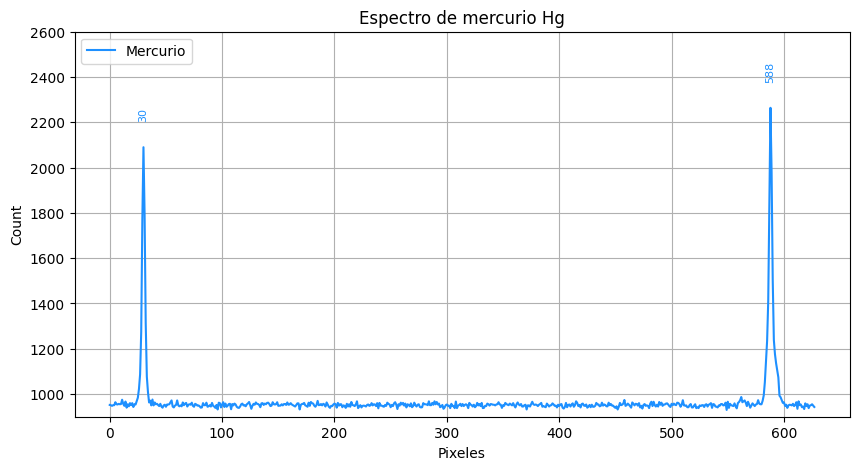

In [61]:
df_4 = pd.read_csv(file_4, sep="\s+", header=None, names=["x","y"])

def plot_with_peaks_1(df, label, color):
    plt.plot(df["x"], df["y"], label=label, color=color)
    # Solo picos que superen el 10% del máximo
    peaks, _ = find_peaks(df["y"], height=df["y"].max()*0.7)
    for peak in peaks:
        # Desplazamiento por defecto
        xy_offset = (0, 20)
        # Si el pico es x = 1269, moverlo un poco a la derecha
        if int(df["x"][peak]) == 1269:
            xy_offset = (10, 20)  # 10 pixeles a la derecha
        plt.annotate(f'{int(df["x"][peak])}',
                     (df["x"][peak], df["y"][peak]),
                     textcoords="offset points", xytext=xy_offset,
                     ha='center', fontsize=8, color=color, rotation=90)

plt.figure(figsize=(10,5))
plot_with_peaks_1(df_4, "Mercurio", "dodgerblue")  # df_4, no df_1
plt.xlabel("Pixeles")
plt.ylabel("Count")
plt.title("Espectro de mercurio Hg")
plt.grid(True)
plt.legend()
plt.ylim(900, 2600)
#plt.savefig("Mercurio.png", dpi=300)  # Descomenta para guardar
plt.show()


In [62]:
#from google.colab import files
#files.download("Mercurio.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1470497735.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_5 = pd.read_csv(file_5, sep="\s+", header=None, names=["x","y"])


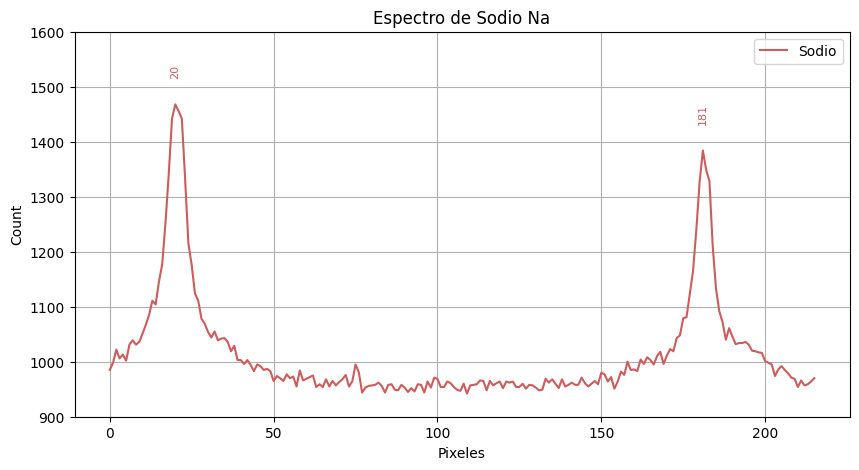

In [69]:
df_5 = pd.read_csv(file_5, sep="\s+", header=None, names=["x","y"])

def plot_with_peaks_1(df, label, color):
    plt.plot(df["x"], df["y"], label=label, color=color)
    # Solo picos que superen el 10% del máximo
    peaks, _ = find_peaks(df["y"], height=df["y"].max()*0.8)
    for peak in peaks:
        # Desplazamiento por defecto
        xy_offset = (0, 20)
        # Si el pico es x = 1269, moverlo un poco a la derecha
        if int(df["x"][peak]) == 1269:
            xy_offset = (10, 20)  # 10 pixeles a la derecha
        plt.annotate(f'{int(df["x"][peak])}',
                     (df["x"][peak], df["y"][peak]),
                     textcoords="offset points", xytext=xy_offset,
                     ha='center', fontsize=8, color=color, rotation=90)

plt.figure(figsize=(10,5))
plot_with_peaks_1(df_5, "Sodio", "indianred")  # df_4, no df_1
plt.xlabel("Pixeles")
plt.ylabel("Count")
plt.title("Espectro de Sodio Na")
plt.grid(True)
plt.legend()
plt.ylim(900, 1600)
#plt.savefig("Sodio.png", dpi=300)  # Descomenta para guardar
plt.show()

In [70]:
#from google.colab import files
#files.download("Sodio.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>